In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import shap

# Set font before plotting
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Data Preprocessing

In [2]:
# Read the CSV
df = pd.read_csv('C:/Users/User/Downloads/Kyushu Datasheets/data_with_press_and_weather.csv', low_memory=False)

# Drop rows with excessive missing values
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    threshold = df.shape[1] // 2
    df = df.dropna(thresh=threshold + 1)
    print(f"Rows with more than half NaN dropped. Remaining rows: {len(df)}")
else:
    print("No missing values found.")

Rows with more than half NaN dropped. Remaining rows: 2811


In [3]:
# Clean and filter '강번'
df['강번'] = pd.to_numeric(df['강번'], errors='coerce')
df = df.dropna(subset=['강번'])
df = df[df['강번'].between(9000, 500000000)]

# Outlier removal
if '사용전력량' in df.columns:
    target_value = len(df)
    df = df[df['사용전력량'] >= 15000]
    removed_target_value = target_value - len(df)
    print(f"Removed {removed_target_value} rows where '사용전력량' < 15000.")
else:
    print(f"Warning: '사용전력량' column not found.")

if '장입량t' in df.columns:
    target_value = len(df)
    df = df[df['장입량t'] >= 50]
    removed_target_value = target_value - len(df)
    print(f"Removed {removed_target_value} rows where '장입량t' < 50.")
else:
    print(f"Warning: '장입량t' column not found.")
'''
# Outlier removal
if 'Precipitation (mm)' in df.columns:
    initial_count_oxygen = len(df)
    df = df[df['Precipitation (mm)'] <= 10]
    removed_count_oxygen = initial_count_oxygen - len(df)
    print(f"Removed {removed_count_oxygen} rows where {'Precipitation (mm)'} > 10.")
else:
    print(f"Warning: '{'Precipitation (mm)'}' column not found.")
'''

# For double checking
df.to_csv('For_my_use_1.csv', index=False)

Removed 4 rows where '사용전력량' < 15000.
Removed 5 rows where '장입량t' < 50.


In [4]:
chin_variables = [col for col in df.columns if '친' in col and '친단' not in col]
son_variables = [col for col in df.columns if '손' in col]
ja_variables = [col for col in df.columns if '자' in col and '자동차' not in col and '부자재' not in col]

df['chin_total'] = df[chin_variables].sum(axis=1)
df['son_total'] = df[son_variables].sum(axis=1)
df['ja_total'] = df[ja_variables].sum(axis=1)

# 친

C:\Users\User\AppData\Local\Temp\ipykernel_19804\2143033976.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]


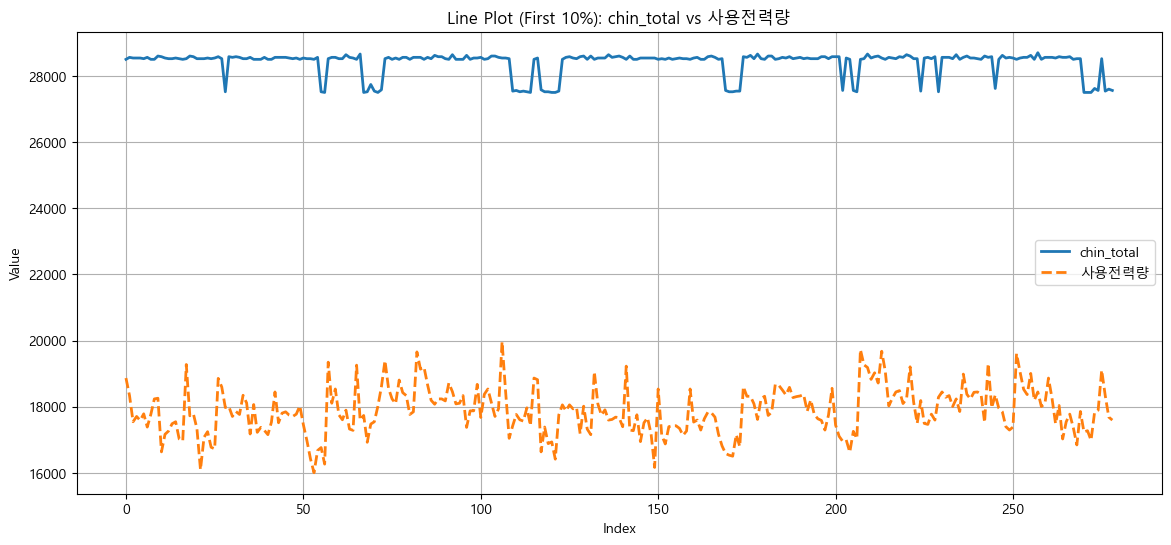

In [5]:
# Slice the first 10% of data
n = int(len(df) * 0.1)

series1 = df['chin_total'].fillna(0).iloc[:n]
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(series1.values, label='chin_total', linewidth=2)
plt.plot(series2.values, label='사용전력량', linewidth=2, linestyle='--')
plt.title('Line Plot (First 10%): chin_total vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19804\1658647381.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)


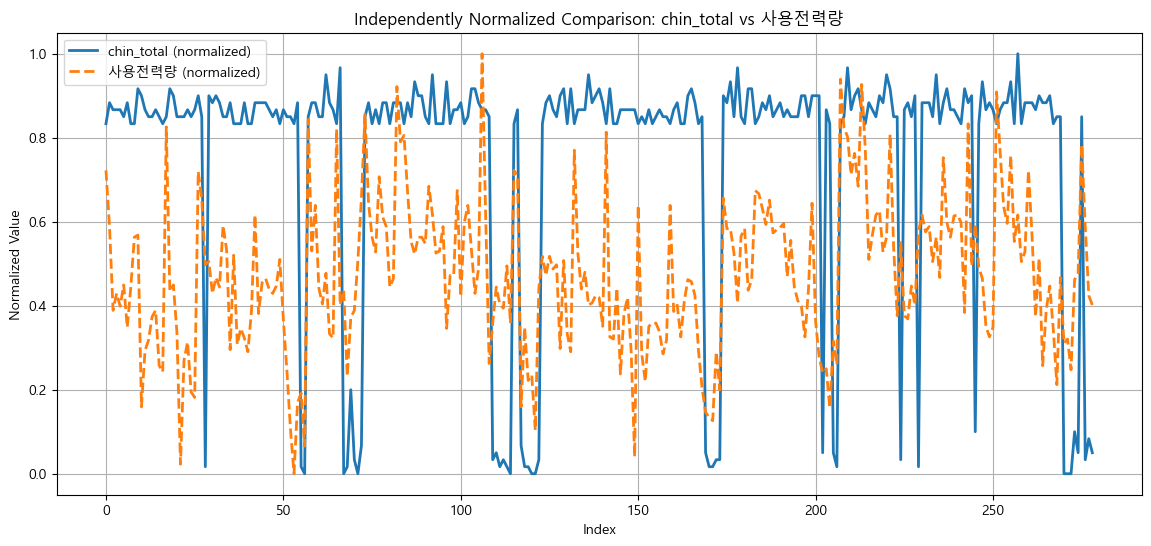

In [6]:
# Extract full series (or use sliced versions if needed)
series1 = df['chin_total'].fillna(0).iloc[:n].values.reshape(-1, 1)
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)

# Normalize individually
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
norm_series1 = scaler1.fit_transform(series1).flatten()
norm_series2 = scaler2.fit_transform(series2).flatten()

# Plot normalized data
plt.figure(figsize=(14, 6))
plt.plot(norm_series1, label='chin_total (normalized)', linewidth=2)
plt.plot(norm_series2, label='사용전력량 (normalized)', linewidth=2, linestyle='--')
plt.title('Independently Normalized Comparison: chin_total vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

# 자

C:\Users\User\AppData\Local\Temp\ipykernel_19804\2727587878.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]


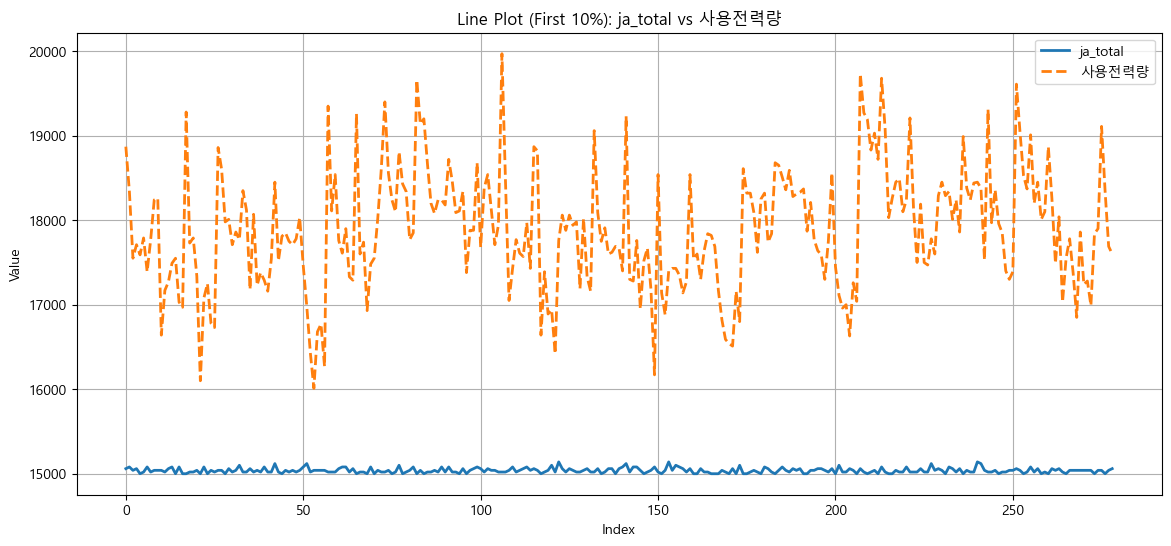

In [7]:
series1 = df['ja_total'].fillna(0).iloc[:n]
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(series1.values, label='ja_total', linewidth=2)
plt.plot(series2.values, label='사용전력량', linewidth=2, linestyle='--')
plt.title('Line Plot (First 10%): ja_total vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19804\2143304675.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)


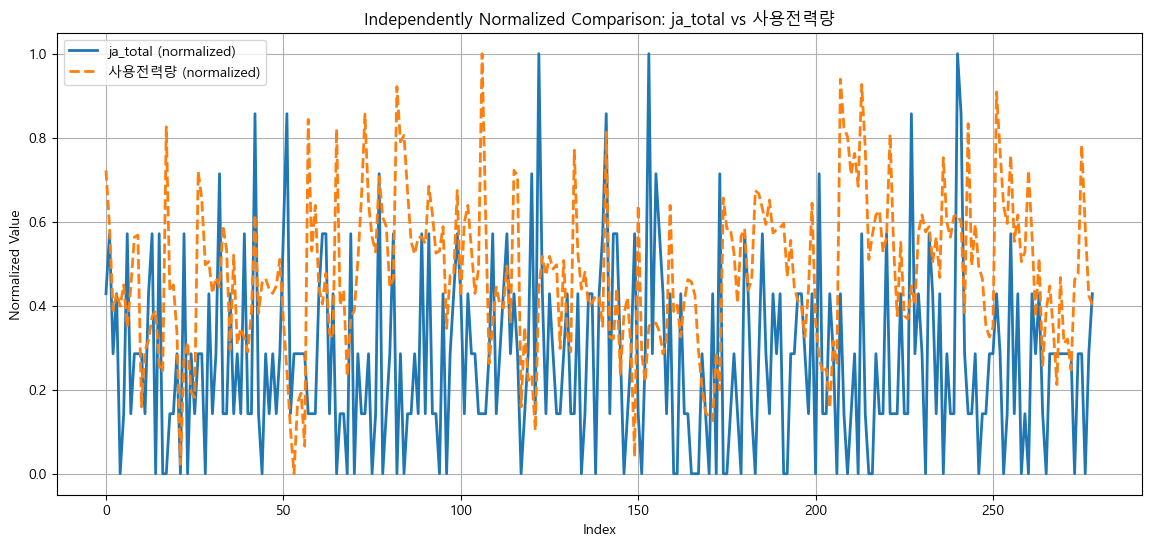

In [8]:
# Extract full series (or use sliced versions if needed)
series1 = df['ja_total'].fillna(0).iloc[:n].values.reshape(-1, 1)
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)

# Normalize individually
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
norm_series1 = scaler1.fit_transform(series1).flatten()
norm_series2 = scaler2.fit_transform(series2).flatten()

# Plot normalized data
plt.figure(figsize=(14, 6))
plt.plot(norm_series1, label='ja_total (normalized)', linewidth=2)
plt.plot(norm_series2, label='사용전력량 (normalized)', linewidth=2, linestyle='--')
plt.title('Independently Normalized Comparison: ja_total vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

# 손

C:\Users\User\AppData\Local\Temp\ipykernel_19804\289271190.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]


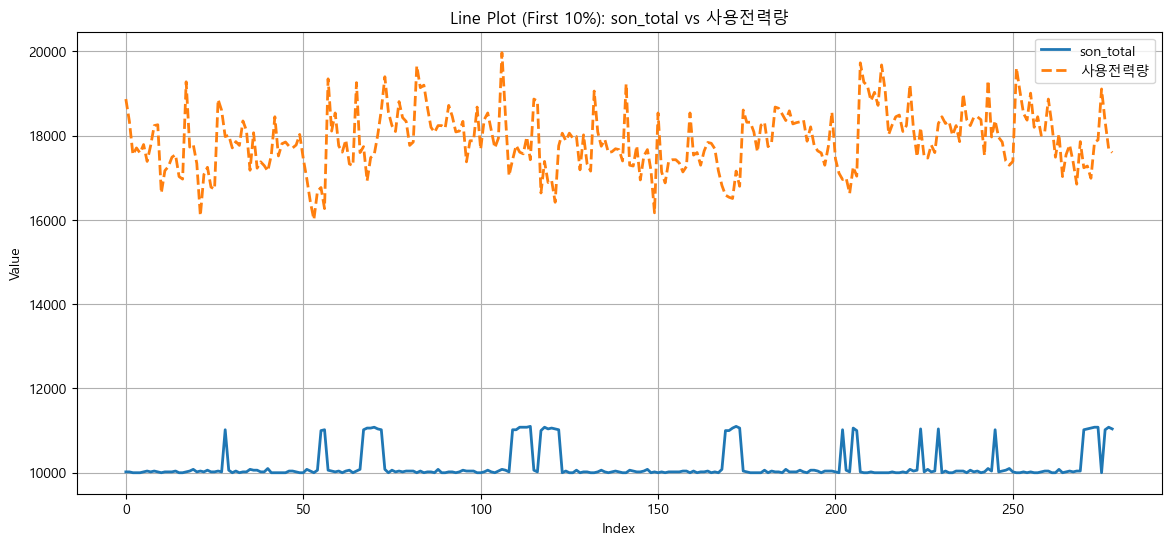

In [9]:
series1 = df['son_total'].fillna(0).iloc[:n]
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(series1.values, label='son_total', linewidth=2)
plt.plot(series2.values, label='사용전력량', linewidth=2, linestyle='--')
plt.title('Line Plot (First 10%): son_total vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19804\2721991256.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)


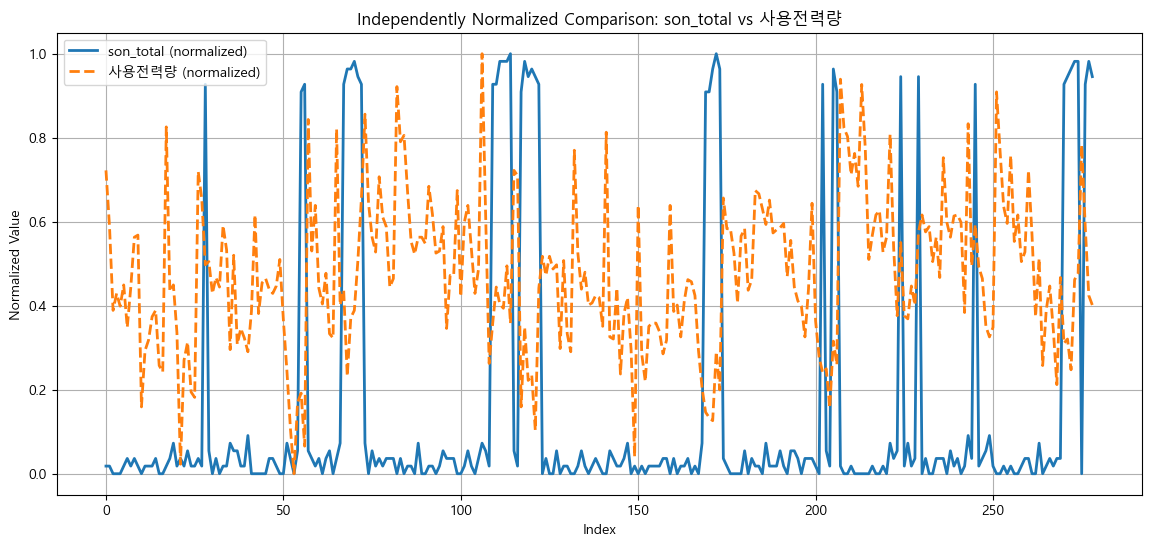

In [10]:
# Extract full series (or use sliced versions if needed)
series1 = df['son_total'].fillna(0).iloc[:n].values.reshape(-1, 1)
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)

# Normalize individually
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
norm_series1 = scaler1.fit_transform(series1).flatten()
norm_series2 = scaler2.fit_transform(series2).flatten()

# Plot normalized data
plt.figure(figsize=(14, 6))
plt.plot(norm_series1, label='son_total (normalized)', linewidth=2)
plt.plot(norm_series2, label='사용전력량 (normalized)', linewidth=2, linestyle='--')
plt.title('Independently Normalized Comparison: son_total vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

# 장입량

C:\Users\User\AppData\Local\Temp\ipykernel_19804\4059252278.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]


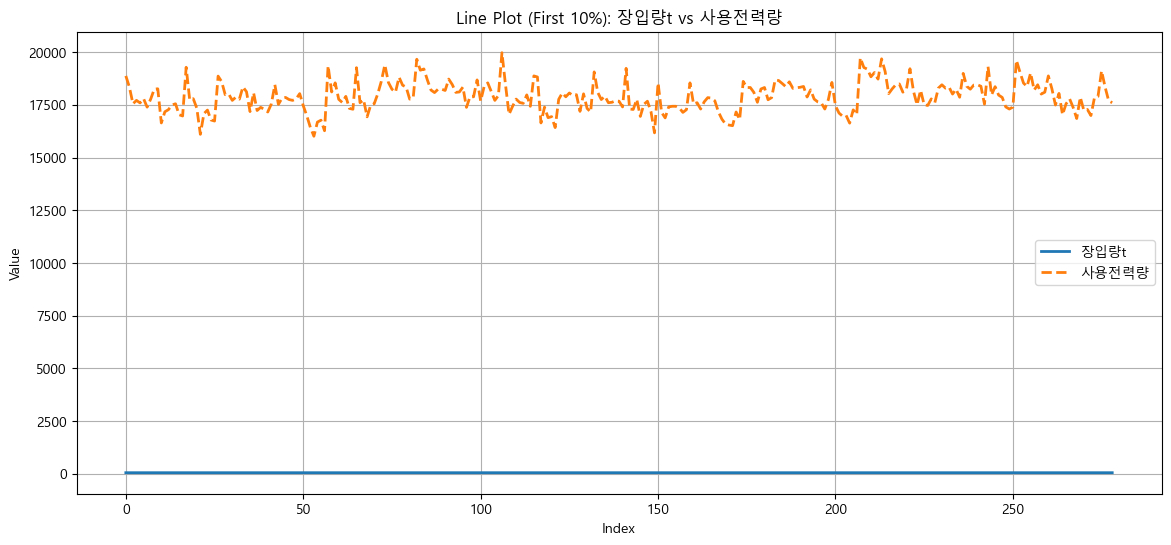

In [11]:
series1 = df['장입량t'].fillna(0).iloc[:n]
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(series1.values, label='장입량t', linewidth=2)
plt.plot(series2.values, label='사용전력량', linewidth=2, linestyle='--')
plt.title('Line Plot (First 10%): 장입량t vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
plt.figure(figsize=(14, 6))
plt.plot(series1.values, label='장입량t', linewidth=2)
plt.title('Line Plot (First 10%): 장입량t vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

C:\Users\User\AppData\Local\Temp\ipykernel_19804\3727696799.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)


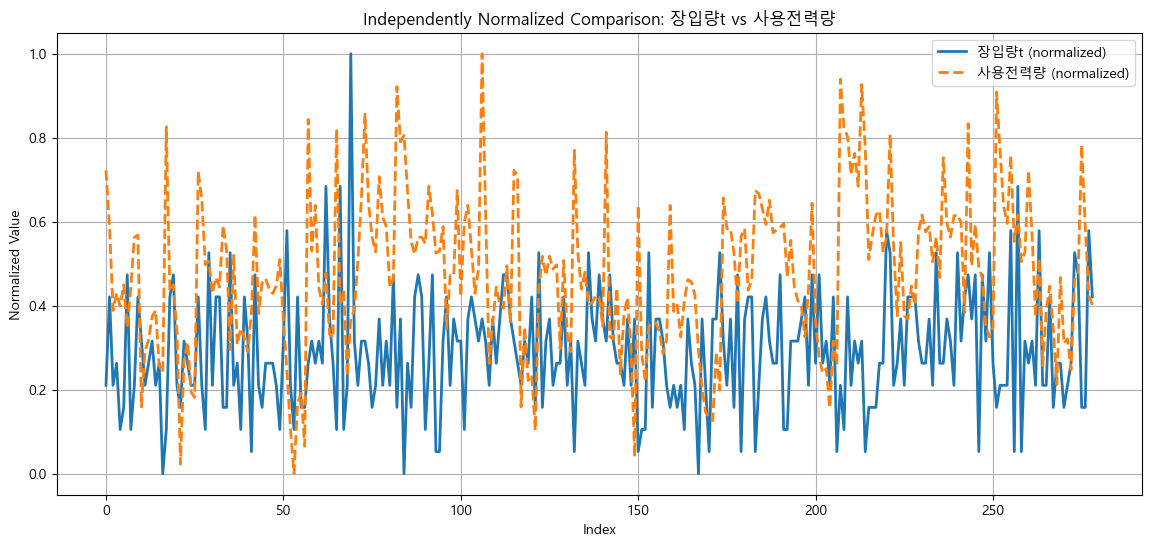

In [12]:
# Extract full series (or use sliced versions if needed)
series1 = df['장입량t'].fillna(0).iloc[:n].values.reshape(-1, 1)
series2 = df['사용전력량'].fillna(method='ffill').iloc[:n].values.reshape(-1, 1)

# Normalize individually
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
norm_series1 = scaler1.fit_transform(series1).flatten()
norm_series2 = scaler2.fit_transform(series2).flatten()

# Plot normalized data
plt.figure(figsize=(14, 6))
plt.plot(norm_series1, label='장입량t (normalized)', linewidth=2)
plt.plot(norm_series2, label='사용전력량 (normalized)', linewidth=2, linestyle='--')
plt.title('Independently Normalized Comparison: 장입량t vs 사용전력량')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()